In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from plotnine import *

In [4]:
class theme_fs(theme_light):
    """
    A theme similar to :class:`theme_linedraw` but with light grey
    lines and axes to direct more attention towards the data.
    Parameters
    ----------
    base_size : int, optional
        Base font size. All text sizes are a scaled versions of
        the base font size. Default is 11.
    base_family : str, optional
        Base font family.
    """

    def __init__(self, base_size=11, base_family='DejaVu Sans'):
        theme_light.__init__(self, base_size, base_family)
        self.add_theme(theme(
            axis_ticks=element_line(color='#DDDDDD', size=0.5),
            panel_border=element_rect(fill='None', color='#838383',
                                      size=1),
            strip_background=element_rect(
                fill='#DDDDDD', color='#838383', size=1),
            strip_text_x=element_text(color='black'),
            strip_text_y=element_text(color='black', angle=-90),
            legend_key=element_blank(),
        ), inplace=True)

In [5]:
df = pd.read_csv('./data/settles.acl16.learning_traces.13m.csv.gz')
df['delta_days'] = df['delta'].apply(lambda d: d / (60 * 60 * 24))

In [6]:
# df = df.head(3000)

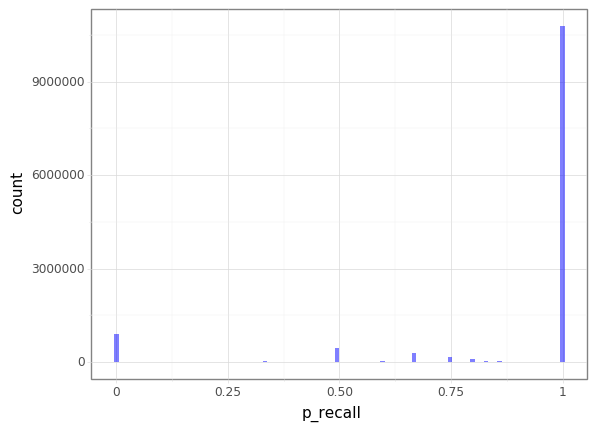

<ggplot: (8747542437789)>

In [7]:
(
    ggplot(df)
    + geom_bar(
        aes(x='p_recall'),
        stat=stat_bin(bins=100),
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
)

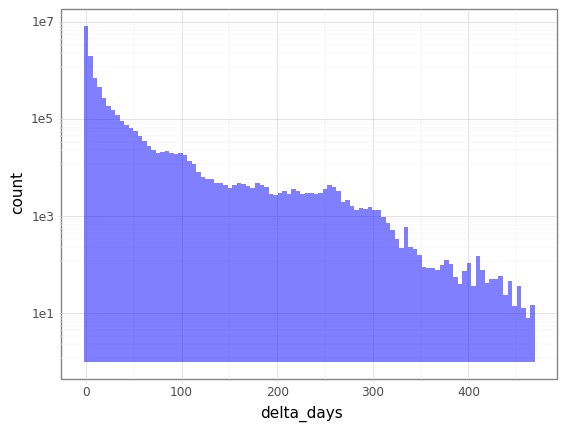

<ggplot: (8747552157425)>

In [8]:
(
    ggplot(df)
    + geom_bar(
        aes(x='delta_days'),
        stat=stat_bin(bins=100),
        fill='blue',
        alpha=0.5
    )
    + scale_y_log10()
    + theme_fs()
)

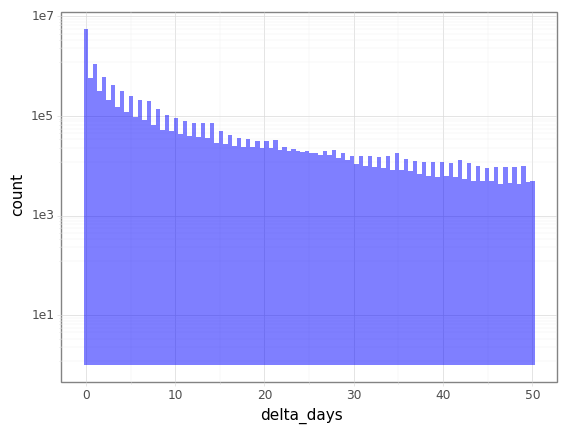

<ggplot: (8747549677449)>

In [9]:
(
    ggplot(df.loc[df.delta_days < 50])
    + geom_bar(
        aes(x='delta_days'),
        stat=stat_bin(bins=100),
        fill='blue',
        alpha=0.5
    )
    + scale_y_log10()
    + theme_fs()
)

/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_bar : Removed 42 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


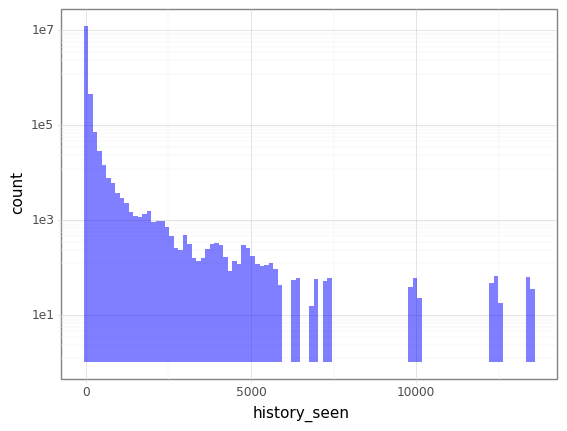

<ggplot: (8747533196069)>

In [10]:
(
    ggplot(df)
    + geom_bar(
        aes(x='history_seen'),
        stat=stat_bin(bins=100),
        fill='blue',
        alpha=0.5
    )
    + scale_y_log10()
    + theme_fs()
)

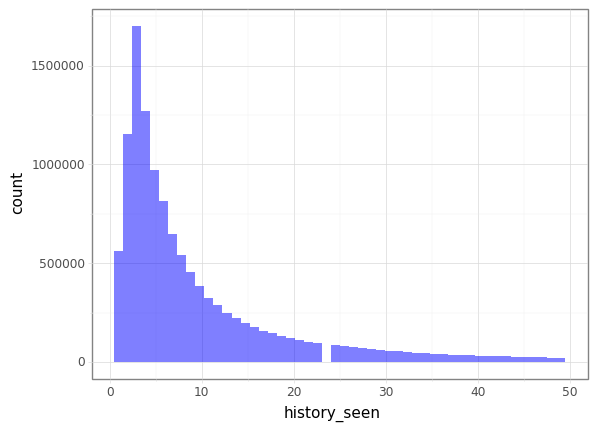

<ggplot: (8747526942337)>

In [11]:
(
    ggplot(df.loc[df.history_seen < 50])
    + geom_bar(
        aes(x='history_seen'),
        stat=stat_bin(bins=50),
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
)

/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_bar : Removed 47 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


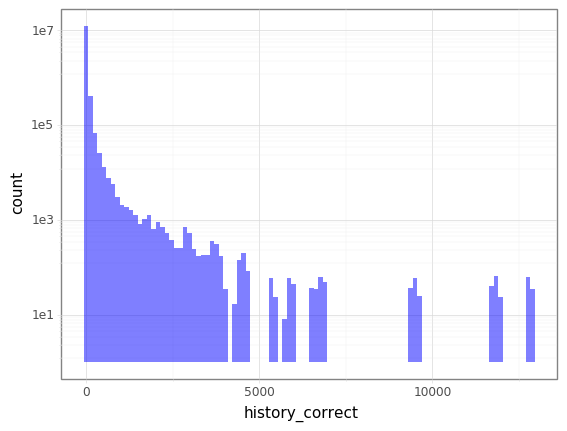

<ggplot: (8747520870541)>

In [12]:
(
    ggplot(df)
    + geom_bar(
        aes(x='history_correct'),
        stat=stat_bin(bins=100),
        fill='blue',
        alpha=0.5
    )
    + scale_y_log10()
    + theme_fs()
)

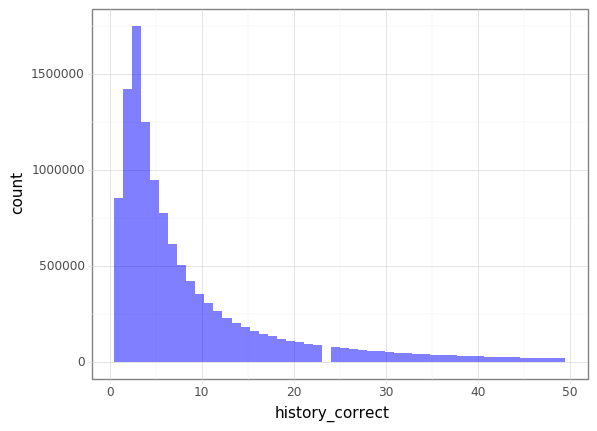

<ggplot: (8747533197609)>

In [13]:
(
    ggplot(df.loc[df.history_correct < 50])
    + geom_bar(
        aes(x='history_correct'),
        stat=stat_bin(bins=50),
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
)

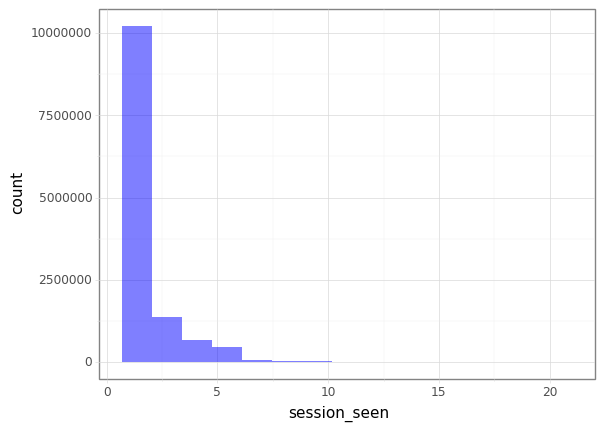

<ggplot: (8747526866405)>

In [14]:
(
    ggplot(df)
    + geom_bar(
        aes(x='session_seen'),
        stat=stat_bin(bins=15),
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
)

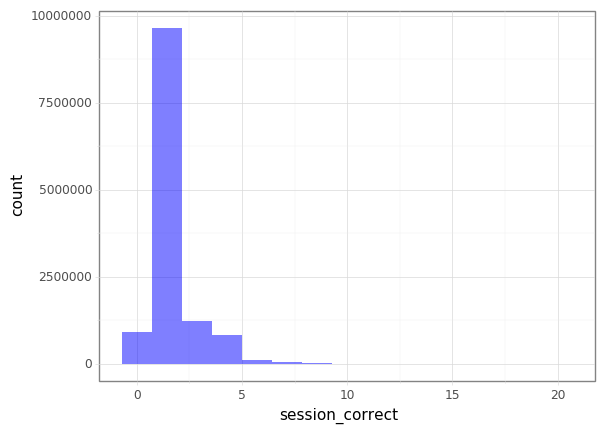

<ggplot: (8747549952541)>

In [15]:
(
    ggplot(df)
    + geom_bar(
        aes(x='session_correct'),
        stat=stat_bin(bins=15),
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
)

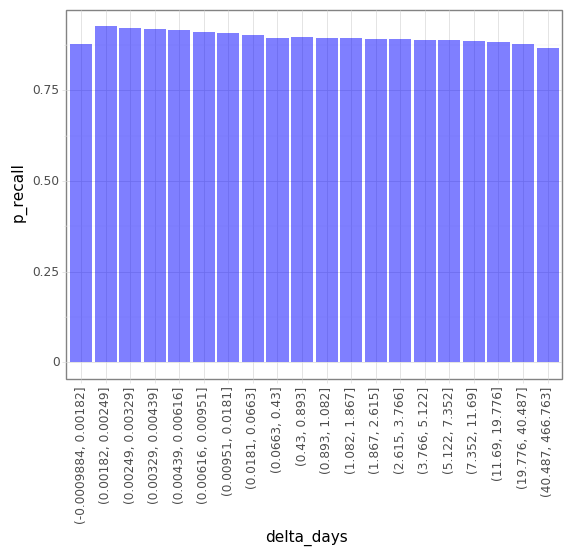

<ggplot: (8747573411665)>

In [16]:
def _bin_p_recall(group):
    return pd.DataFrame([{'p_recall': group.p_recall.mean()}])
(
    ggplot(
        df.groupby(
            pd.qcut(df.delta_days, 20)
        ).apply(_bin_p_recall).reset_index()
    )
    + geom_bar(
        aes(x='delta_days', y='p_recall', ymin=0.75, ymax=1.0),
        stat='identity',
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
    + theme(
        axis_text_x=element_text(rotation=90)
    )
)

## Variations of Half-life regression (HLR)

short-hand for each record \begin{align}<\cdot>&=<\Delta,x,P[\text{recall}]\in[0,1]>\\&=<\Delta,x,y\in\{0,1\}>\end{align}

Regression against recall probability $$l_\text{recall}(<\cdot>;\theta)=(p-f_\theta(x,\Delta))^2$$

Regression against back-solved half-life $$l_\text{half-life}(<\cdot>;\theta)=(\frac{-\Delta}{\log_2{p}}-f_\theta(x,\Delta))^2$$

Binary recall classification $$l_\text{binary}(<\cdot>;\theta)=\text{xent}(f_\theta(x,\Delta),y)$$

Assume that half-life increases exponentially with each repeated exposure, with a linear approximator, you get $f_\theta(x,\Delta)=2^{\theta\cdot x}$. Use this parameterization with regression against both recall probability and back-solved half-life, you get Settles' formulation:
$$l(<\cdot>; \theta)=(p-2^{\frac{\Delta}{2^{\theta\cdot x}}})^2+\alpha(\frac{\Delta}{\log_2(p)}-2^{\theta\cdot{x}})^2+\lambda|\theta|_2^2$$

## reliability diagram, expected calibration error

In multi-class classification setting, the general idea of calibration is that confidence should match accuracy, i.e. when the model is 60% confidence, the probability of it being correct should be 60%.

reliability diagram: bin validation examples by predicted probability, then calculate the average accuracy within each bin, plot average accuracy against confidence. ideal calibration should be a diagonal line.

expected calibration error (ECE):  the difference in expectation between confidence and accuracy is
$$\mathbb{E}_{\hat{P}}[|\mathbb{P}(\hat{Y}=Y|\hat{P}=p)-p)|$$
This can be approximated by a weighted average of bins' accuracy - confidence difference (the gap showns as red bars in reliability diagrams)
$$\text{ECE}=\sum_{i}\frac{|B_i|}{n}|\text{acc}(B_m)-\text{conf}(B_m)|$$

In [18]:
results = pd.read_csv('./results/hlr.settles.acl16.learning_traces.13m.preds', delimiter='\t')

/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/plotnine/layer.py:433: PlotnineWarning: position_stack : Removed 2 rows containing missing values.
  data = self.position.setup_data(self.data, params)


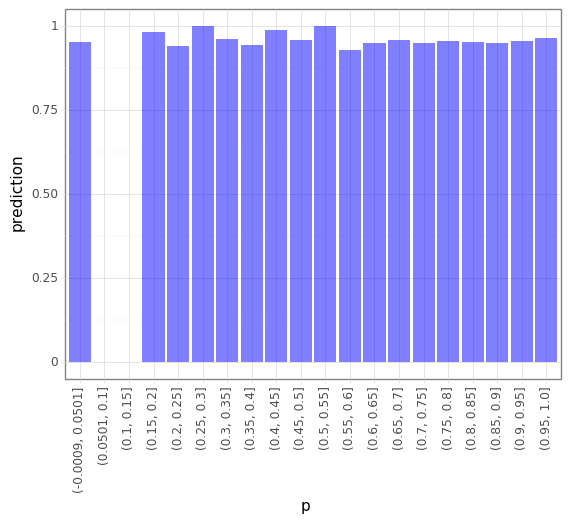

<ggplot: (8747520737333)>

In [19]:
def _bin_prediction(group):
    return pd.DataFrame([{'prediction':  group.pp.mean()}])

(
    ggplot(
        results.groupby(
            pd.cut(results.p, 20)
        ).apply(_bin_prediction).reset_index()
    )
    + geom_bar(
        aes(x='p', y='prediction'),
        stat='identity',
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
    + theme(
        axis_text_x=element_text(rotation=90)
    )
)

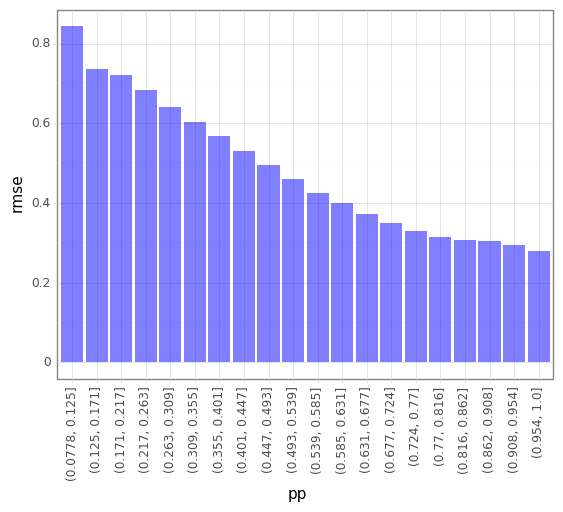

<ggplot: (8747520675657)>

In [20]:
def _bin_rmse(group):
    return pd.DataFrame([{
        'rmse':  ((group.pp - group.p) ** 2).mean() ** (1/2)
    }])

(
    ggplot(
        results.groupby(
            pd.cut(results.pp, 20)
        ).apply(_bin_rmse).reset_index()
    )
    + geom_bar(
        aes(x='pp', y='rmse'),
        stat='identity',
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
    + theme(
        axis_text_x=element_text(rotation=90)
    )
)

When our model directly predicts the probability, instead of using ECE, we can directly measure the miscalibration
$$\text{ECE}=\sum_i\frac{|B_i|}{n}|\text{precition}(B_i) - \text{ground_truth}(B_i)|$$

expected calibration error 0.44739960267593976


/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/plotnine/layer.py:433: PlotnineWarning: position_stack : Removed 1 rows containing missing values.
  data = self.position.setup_data(self.data, params)


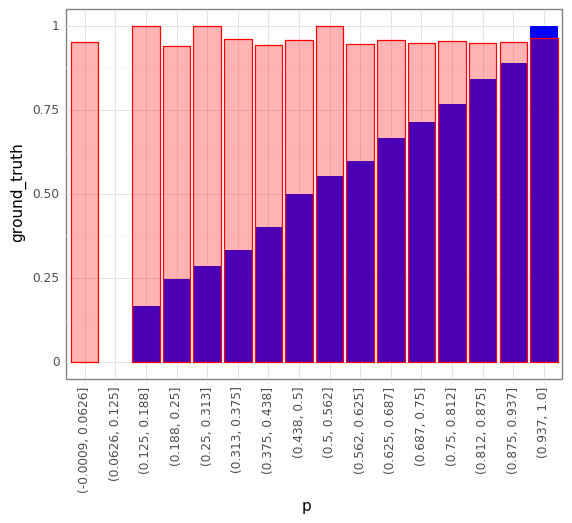

<ggplot: (8747520379265)>

In [21]:
def _bin_miscalibration(group):
    return pd.DataFrame([{
        'miscalibration': (group.pp - group.p).abs().mean(),
        'prediction': group.pp.mean(),
        'ground_truth': group.p.mean()
    }])

miscalibration = results.groupby(pd.cut(results.p, 16)).apply(_bin_miscalibration).reset_index()

print('expected calibration error', miscalibration.miscalibration.mean())

(
    ggplot(miscalibration)
    + geom_bar(
        aes(x='p', y='ground_truth'),
        stat='identity',
        fill='blue',
        alpha=1.0
    )
    + geom_bar(
        aes(x='p', y='prediction'),
        stat='identity',
        fill='red',
        color='red',
        alpha=0.3
    )
    + theme_fs()
    + theme(
        axis_text_x=element_text(rotation=90)
    )
)

Note that this formulation incorporates two heuristics
1. the memory strength follows an exponential forgetting curve, hence the half-life
2. half-life increases exponentially with number of repetitions
3. the exponent of the half-life predictor is a linear function of several features

Doesn't this mean the predicted memory strength (probability of recall) is essentially a linear function of those features?

Next we inspect if the model's behavior is linear wrt some features.

In [28]:
splitpoint = int(0.9 * len(df))
train_df, test_df = df.iloc[:splitpoint], df.iloc[splitpoint:]

In [43]:
df1 = pd.DataFrame({
    'pp': results.pp.tolist(),
    'hh': results.hh.tolist(),
    'p': results.p.tolist(),
    'h': results.h.tolist(),
    'history_seen': test_df.history_seen.tolist(),
    'history_correct': test_df.history_correct.tolist(),
    'session_seen': test_df.session_seen.tolist(),
    'session_correct': test_df.session_correct.tolist(),
    'delta_days': test_df.delta_days.tolist(),
})

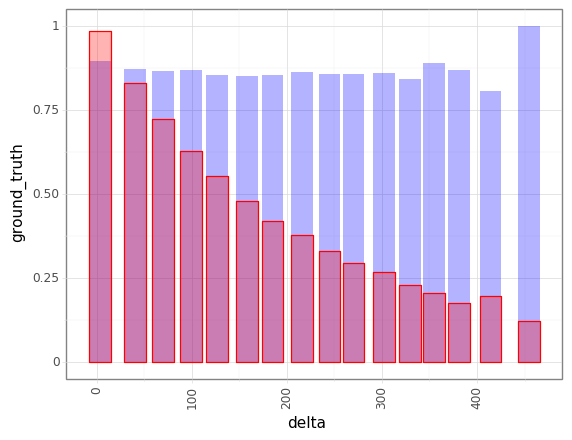

<ggplot: (8746853316589)>

In [48]:
def _bin_delta(group):
    return pd.DataFrame([{
        'prediction': group.pp.mean(),
        'ground_truth': group.p.mean(),
        'delta': group.delta_days.mean(),
    }])

(
    ggplot(
        df1.groupby(
            pd.cut(df1.delta_days, 16)
        ).apply(_bin_delta).reset_index()
    )
    + geom_bar(
        aes(x='delta', y='ground_truth'),
        stat='identity',
        fill='blue',
        alpha=0.3
    )
    + geom_bar(
        aes(x='delta', y='prediction'),
        stat='identity',
        fill='red',
        color='red',
        alpha=0.3
    )
    + theme_fs()
    + theme(
        axis_text_x=element_text(rotation=90)
    )
)

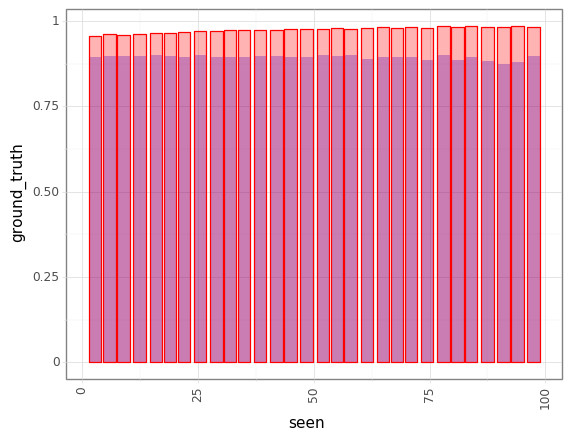

<ggplot: (8746853315317)>

In [54]:
def _bin_history_seen(group):
    return pd.DataFrame([{
        'prediction': group.pp.mean(),
        'ground_truth': group.p.mean(),
        'seen': group.history_seen.mean(),
    }])

_df1 = df1.loc[df1.history_seen < 100]

(
    ggplot(
        _df1.groupby(
            pd.cut(_df1.history_seen, 30)
        ).apply(_bin_history_seen).reset_index()
    )
    + geom_bar(
        aes(x='seen', y='ground_truth'),
        stat='identity',
        fill='blue',
        alpha=0.3
    )
    + geom_bar(
        aes(x='seen', y='prediction'),
        stat='identity',
        fill='red',
        color='red',
        alpha=0.3
    )
    + theme_fs()
    + theme(
        axis_text_x=element_text(rotation=90)
    )
)

There are several knobs to be tweaked in the general formulation:
- labels: derived $p$, binary $y$
- linear, nn
- on/off: exponentially increased half-life
- on/off: loss wrt back-solved half-life (from derived $p$)